In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('movie_metadata.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'movie_metadata.csv'

In [1]:
data.head(5)

NameError: name 'data' is not defined

In [4]:
data.shape

(5043, 28)

In [5]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

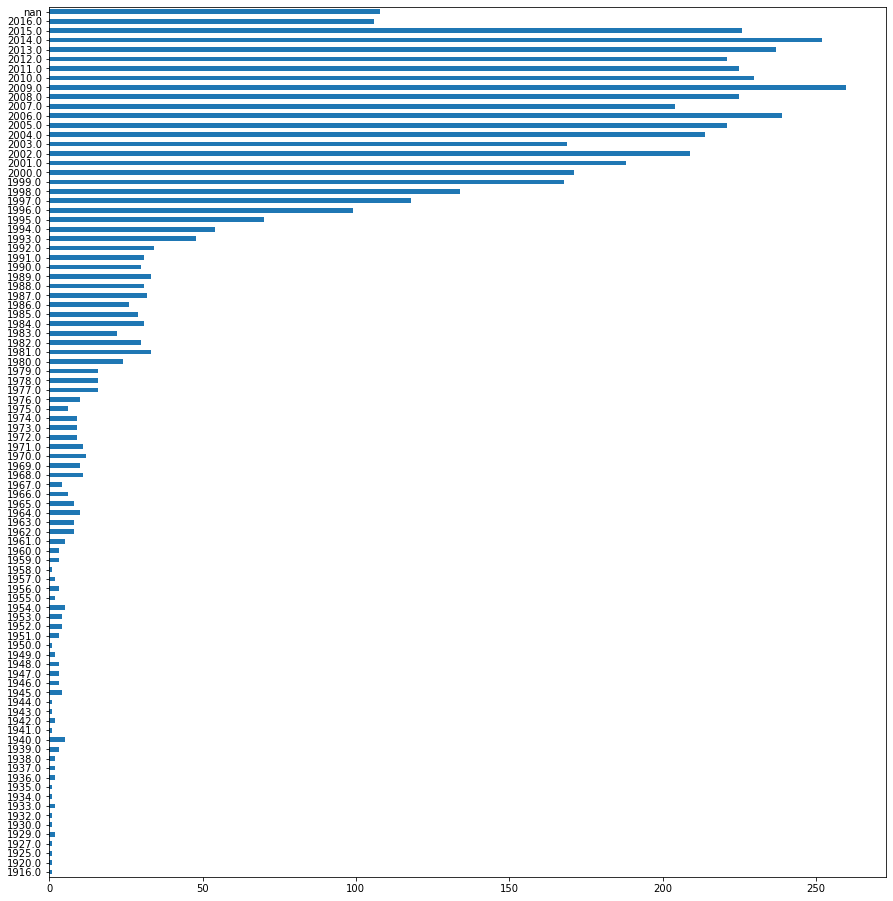

In [6]:
# we have movies only upto 2016
import matplotlib.pyplot as plt
data.title_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

In [8]:
# recommendation will be based on these features only
data = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [9]:
data.head(10)

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...
5,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action|Adventure|Sci-Fi,John Carter
6,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,Action|Adventure|Romance,Spider-Man 3
7,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Tangled
8,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Action|Adventure|Sci-Fi,Avengers: Age of Ultron
9,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,Adventure|Family|Fantasy|Mystery,Harry Potter and the Half-Blood Prince


In [11]:
data['actor_1_name'] = data['actor_1_name'].replace(np.nan, 'unknown')
data['actor_2_name'] = data['actor_2_name'].replace(np.nan, 'unknown')
data['actor_3_name'] = data['actor_3_name'].replace(np.nan, 'unknown')
data['director_name'] = data['director_name'].replace(np.nan, 'unknown')

In [12]:
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy|Drama,Signed Sealed Delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime|Drama|Mystery|Thriller,The Following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama|Horror|Thriller,A Plague So Pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy|Drama|Romance,Shanghai Calling


In [15]:
data['genres'] = data['genres'].str.replace('|', ' ')

In [16]:
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,Signed Sealed Delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,The Following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,A Plague So Pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,Shanghai Calling


In [17]:
data['movie_title'] = data['movie_title'].str.lower()

In [18]:
# null terminating char at the end
data['movie_title'][1]

"pirates of the caribbean: at world's end\xa0"

In [19]:
# removing the null terminating char at the end
data['movie_title'] = data['movie_title'].apply(lambda x : x[:-1])

In [20]:
data['movie_title'][1]

"pirates of the caribbean: at world's end"

In [21]:
data.to_csv('data.csv',index=False)